# <b><span style='color:#F1A424'>AutoML - Regression - Fish Weight Prediction - Deploy Models </span> </b>

### Disclaimer
The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.

## <b> Problem overview:</b>
    

**Dataset used : Fish Weight Dataset**

**Features**:

- `Species`: Species name of fish
- `Length1`: Vertical length in cm
- `Length2`: Diagonal length in cm
- `Length3`: Cross length in cm
- `Height`: Height in cm
- `Width`: Diagonal width in cm

**Target Variable**:

- `Weight`: Weight of fish in gram

        
**Objective**:

The primary objective is typically to build a model that can accurately predict weight of fish in gram.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoRegressor

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','fish')

In [5]:
# Fetching in teradata dataframe
fish_df = DataFrame("fish")

In [6]:
# first 5 rows
fish_df.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Smelt,8,10.8,11.3,12.6,1.9782,1.2852
Smelt,9,11.4,12.0,13.2,2.2044,1.1484
Smelt,12,11.5,12.2,13.4,2.0904,1.3936
Smelt,9,11.3,11.8,13.1,2.2139,1.1659
Smelt,7,10.0,10.5,11.6,1.972,1.16
Smelt,6,9.3,9.8,10.8,1.7388,1.0476
Smelt,9,10.4,11.0,12.0,2.196,1.38
Smelt,10,11.3,11.8,13.1,2.2139,1.2838
Smelt,9,10.7,11.2,12.4,2.0832,1.2772
Smelt,7,10.1,10.6,11.6,1.7284,1.1484


In [7]:
# fish_df dataset
fish_df.shape

(159, 7)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
fish_df_sample = fish_df.sample(frac = [0.8, 0.2])

In [9]:
fish_df_sample.head()

Species,Weight,Length1,Length2,Length3,Height,Width,sampleid
Smelt,12,11.5,12.2,13.4,2.0904,1.3936,1
Smelt,19,13.2,14.3,15.2,2.8728,2.0672,1
Smelt,19,13.8,15.0,16.2,2.9322,1.8792,1
Pike,1650,59.0,63.4,68.0,10.812,7.48,1
Pike,1550,56.0,60.0,64.0,9.6,6.144,1
Pike,1600,56.0,60.0,64.0,9.6,6.144,2
Pike,430,35.5,38.0,40.5,7.29,4.5765,1
Smelt,13,11.7,12.4,13.5,2.43,1.269,2
Smelt,9,11.4,12.0,13.2,2.2044,1.1484,1
Smelt,8,10.8,11.3,12.6,1.9782,1.2852,2


In [10]:
# Fetching train and test data
fish_df_train= fish_df_sample[fish_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
fish_df_test = fish_df_sample[fish_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
fish_df_train.shape

(127, 7)

In [12]:
# test data shape
fish_df_test.shape

(32, 7)

In [13]:
#train dataset
fish_df_train.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Pike,500,42.0,45.0,48.0,6.96,4.896
Pike,950,48.3,51.7,55.1,8.9262,6.1712
Pike,1250,52.0,56.0,59.7,10.6863,6.9849
Smelt,7,10.1,10.6,11.6,1.7284,1.1484
Smelt,10,11.3,11.8,13.1,2.2139,1.2838
Smelt,9,11.4,12.0,13.2,2.2044,1.1484
Smelt,9,10.7,11.2,12.4,2.0832,1.2772
Pike,300,34.8,37.3,39.8,6.2884,4.0198
Pike,345,36.0,38.5,41.0,6.396,3.977
Pike,1550,56.0,60.0,64.0,9.6,6.144


In [14]:
# test dataset
fish_df_test.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Pike,300,32.7,35.0,38.8,5.9364,4.3844
Pike,200,30.0,32.3,34.8,5.568,3.3756
Parkki,200,21.2,23.0,25.8,10.3458,3.6636
Parkki,273,23.0,25.0,28.0,11.088,4.144
Parkki,90,16.3,17.7,19.8,7.4052,2.673
Bream,340,23.9,26.5,31.1,12.3778,4.6961
Parkki,300,24.0,26.0,29.0,11.368,4.234
Pike,510,40.0,42.5,45.5,6.825,4.459
Pike,300,31.7,34.0,37.8,5.7078,4.158
Smelt,6,9.3,9.8,10.8,1.7388,1.0476


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

### Case 1 : With raise_errors = True

In [17]:
# Creating AutoRegressor instance with xgboost only from model training.
# Keeping early stopping timer threshold to 200 sec and max_models to 6
# and verbose level 2 for detailed loggging.
# Using enable_lasso for lasso feature selection and raise_errors=True 
# to raise error and interrupt run in case of any error. 

aml = AutoRegressor(verbose=2, 
                    include='xgboost', 
                    max_runtime_secs=200,
                    max_models=6, 
                    enable_lasso=True, 
                    raise_errors=True)

- Passed target column `Weight` for `id_column` as well. We can expect error here.

In [18]:
aml.fit(data=fish_df_train, target_column="Weight", id_column='Weight')

TeradataMlException: [Teradata][teradataml](TDML_2308) Arguments 'id_column' and 'target_column' cannot have the same value.

### Case 2: With raise_errors = False (Default)

In [19]:
# Creating AutoRegressor instance with xgboost only from model training.
# Keeping early stopping timer threshold to 200 sec and max_models to 6
# and verbose level 2 for detailed loggging.
# Using enable_lasso for lasso feature selection and raise_errors=False 
# to ignore any error and proceed with default option. 

aml = AutoRegressor(verbose=2, 
                    include='xgboost', 
                    max_runtime_secs=200,
                    max_models=6, 
                    enable_lasso=True, 
                    raise_errors=False)

- Again passed target column `Weight` for `id_column` as well but since `raise_errors` is set to False, it will ignore error and proceed with default id for AutoML which is `automl_id`. It will provide user warning for ignoring wrong id_column.

2026-01-21 09:46:31,527 | WARNING  | id_column and target_column cannot have same value. Replacing id_column with 'automl_id' column.


2026-01-21 09:46:31,550 | INFO     | Feature Exploration started
2026-01-21 09:46:31,550 | INFO     | Data Overview:
2026-01-21 09:46:31,907 | INFO     | Total Rows in the data: 127
2026-01-21 09:46:32,198 | INFO     | Total Columns in the data: 7
2026-01-21 09:46:38,866 | INFO     | Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
Length2,FLOAT,127,0,None,0,127,0,0.0,100.0
Species,VARCHAR(20) CHARACTER SET LATIN,127,0,0,None,None,None,0.0,100.0
Width,FLOAT,127,0,None,0,127,0,0.0,100.0
Length3,FLOAT,127,0,None,0,127,0,0.0,100.0
Height,FLOAT,127,0,None,0,127,0,0.0,100.0
Length1,FLOAT,127,0,None,0,127,0,0.0,100.0
Weight,INTEGER,127,0,None,1,126,0,0.0,100.0


2026-01-21 09:46:43,070 | INFO     | Statistics of Data:


ATTRIBUTE,StatName,StatValue
Length2,MAXIMUM,63.4
Length2,STANDARD DEVIATION,10.868993714781213
Length2,PERCENTILES(25),20.75
Length2,PERCENTILES(50),27.5
Weight,COUNT,127.0
Weight,MINIMUM,0.0
Weight,MAXIMUM,1650.0
Weight,MEAN,410.3307086614173
Weight,STANDARD DEVIATION,367.39585621044364
Weight,PERCENTILES(25),120.0


2026-01-21 09:46:43,894 | INFO     | Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
Species                   7         
2026-01-21 09:46:52,137 | INFO     | No Futile columns found.
2026-01-21 09:47:01,846 | INFO     | Target Column Distribution:


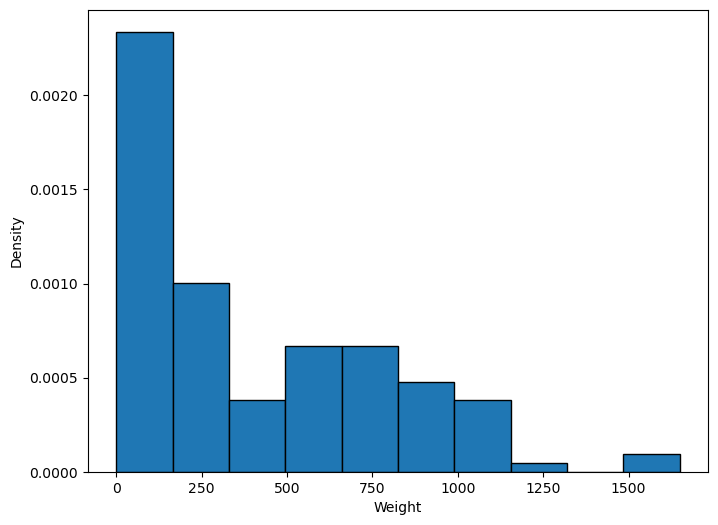

2026-01-21 09:47:16,767 | INFO     | Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                             
  ColumnName  OutlierPercentage
0    Length3           0.787402
1    Length2           1.574803
2    Length1           1.574803


2026-01-21 09:47:17,297 | INFO     | Feature Engineering started ...                    
2026-01-21 09:47:17,299 | INFO     | Handling duplicate records present in dataset ...  
2026-01-21 09:47:18,342 | INFO     | Analysis completed. No action taken.               
2026-01-21 09:47:18,345 | INFO     | Total time to handle duplicate records: 1.04 sec   
2026-01-21 09:47:18,353 | INFO     | Handling less significant features from data ...   
2026-01-21 09:47:22,194 | INFO     | Analysis indicates all categorical columns are significant. No action Needed.
2026-01-21 09:47:22,198 | INFO     | Total time to handle less significant features: 3.84 sec  
2026-01-21 09:47:22,206 | INFO     | Handling Date Features ...                          
2026-01-21 09:47:22,210 | INFO     | Analysis Completed. Dataset does not contain any feature related to dates. No action needed.
2026-01-21 09:47:22,215 | INFO     | Total time to handle date features: 0.00 sec        
2026-01-21 09:47:22,219 | INFO    

Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,automl_id
1,0,0,0,0,0,0,500,29.1,31.5,36.4,13.7592,4.368,26
1,0,0,0,0,0,0,700,30.4,33.0,38.5,14.938,5.1975,38
1,0,0,0,0,0,0,242,23.2,25.4,30.0,11.52,4.02,42
1,0,0,0,0,0,0,610,30.9,33.5,38.6,15.633,5.1338,46
1,0,0,0,0,0,0,685,31.4,34.0,39.2,15.9936,5.3704,54
1,0,0,0,0,0,0,680,31.8,35.0,40.6,15.4686,6.1306,58
1,0,0,0,0,0,0,575,31.3,34.0,39.5,15.1285,5.5695,50
1,0,0,0,0,0,0,600,29.4,32.0,37.2,14.9544,5.1708,30
1,0,0,0,0,0,0,500,28.7,31.0,36.2,14.3714,4.8146,22
1,0,0,0,0,0,0,363,26.3,29.0,33.5,12.73,4.4555,14


2026-01-21 09:47:34,889 | INFO     | Time taken to encode the columns: 10.71 sec         


2026-01-21 09:47:34,903 | INFO     | Data preparation started ...                        
2026-01-21 09:47:34,903 | INFO     | Outlier preprocessing ...                           
2026-01-21 09:47:48,816 | INFO     | Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                             
  ColumnName  OutlierPercentage
0    Length1           1.574803
1    Length3           0.787402
2    Length2           1.574803
2026-01-21 09:47:49,814 | INFO     | Deleting rows of these columns:                     
['Length2', 'Length1', 'Length3']                                                        
2026-01-21 

Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,automl_id
1,0,0,0,0,0,0,242,23.2,25.4,30.0,11.52,4.02,42
1,0,0,0,0,0,0,685,31.4,34.0,39.2,15.9936,5.3704,54
1,0,0,0,0,0,0,680,31.8,35.0,40.6,15.4686,6.1306,58
1,0,0,0,0,0,0,700,31.9,35.0,40.5,16.2405,5.589,62
1,0,0,0,0,0,0,1000,33.5,37.0,42.6,18.957,6.603,74
1,0,0,0,0,0,0,920,35.0,38.5,44.1,18.0369,6.3063,78
0,0,0,1,0,0,0,300,34.8,37.3,39.8,6.2884,4.0198,28
0,0,0,1,0,0,0,1250,52.0,56.0,59.7,10.6863,6.9849,40
0,0,0,1,0,0,0,456,40.0,42.5,45.5,7.28,4.3225,44
0,1,0,0,0,0,0,60,14.3,15.5,17.4,6.5772,2.3142,48


2026-01-21 09:47:59,943 | INFO     | Time Taken by Outlier processing: 25.03 sec         
2026-01-21 09:48:04,208 | INFO     | Feature selection using lasso ...                   
2026-01-21 09:48:06,316 | INFO     | feature selected by lasso:                          
['Species_2', 'Species_1', 'Species_5', 'Species_6', 'Species_3', 'Species_0', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
2026-01-21 09:48:06,338 | INFO     | Total time taken by feature selection: 2.13 sec     
2026-01-21 09:48:08,270 | INFO     | Scaling Features of lasso data ...                  
2026-01-21 09:48:18,841 | INFO     | columns that will be scaled:                        
['Length1', 'Length2', 'Length3', 'Height', 'Width']                                     
2026-01-21 09:48:28,123 | INFO     | Dataset sample after scaling:                       


Species_1,Species_2,automl_id,Species_5,Species_6,Species_3,Weight,Species_0,Length1,Length2,Length3,Height,Width
0,0,8,0,0,1,430,0,1.0379366915373667,1.0022610237820175,0.8982963381267267,-0.39456554745149713,0.07825924382355093
0,0,11,1,0,0,9,0,-1.5479293040980553,-1.6038563663617744,-1.6016345614296537,-1.5538468723319068,-1.8884631552919493
0,0,14,0,0,0,363,1,0.0548801973288591,0.10702985922880652,0.25962786013787037,0.8478233746243937,0.008484597047917217
0,0,15,1,0,0,7,0,-1.6761540642122086,-1.7232205216355363,-1.7384920924272658,-1.664725516020849,-1.898554529825615
0,0,18,0,0,0,290,1,-0.19088392622326786,-0.1615394901371567,0.04977964594153178,0.7907282954848767,-0.07795523395759878
0,0,19,1,0,0,12,0,-1.5265585107456967,-1.564068314603854,-1.5742630552301315,-1.5820518414268283,-1.7571599563596205
0,0,16,0,0,1,567,0,1.860712235603183,1.7980220589404272,1.6464508409136729,-0.27991862853934696,0.24750601100246344
0,0,10,0,0,0,500,1,0.10830718070975626,0.1766589498051673,0.3508662141362784,1.1788606434753137,0.48306752511689544
0,0,7,1,0,0,12,0,-1.46244613068862,-1.484492211088013,-1.5377677136307681,-1.5394360743570927,-1.8366223226875735
0,0,6,0,0,0,450,1,0.10830718070975626,0.1766589498051673,0.36911388493596026,1.047062362789652,0.2806057194728876


2026-01-21 09:48:31,272 | INFO     | Total time taken by feature scaling: 23.00 sec      
2026-01-21 09:48:31,282 | INFO     | Feature selection using rfe ...                      
2026-01-21 09:49:02,462 | INFO     | feature selected by RFE:                             
['Species_2', 'Length1', 'Length2', 'Length3', 'Height', 'Width']                         
2026-01-21 09:49:02,467 | INFO     | Total time taken by feature selection: 30.70 sec     
2026-01-21 09:49:04,347 | INFO     | Scaling Features of rfe data ...                     
2026-01-21 09:49:11,455 | INFO     | columns that will be scaled:                         
['r_Length1', 'r_Length2', 'r_Length3', 'r_Height', 'r_Width']                            
2026-01-21 09:49:20,357 | INFO     | Dataset sample after scaling:                        


Weight,automl_id,r_Species_2,r_Length1,r_Length2,r_Length3,r_Height,r_Width
430,8,0,1.0379366915373667,1.0022610237820175,0.8982963381267267,-0.39456554745149713,0.07825924382355093
9,11,0,-1.5479293040980553,-1.6038563663617744,-1.6016345614296537,-1.5538468723319068,-1.8884631552919493
363,14,0,0.0548801973288591,0.10702985922880652,0.25962786013787037,0.8478233746243937,0.008484597047917217
7,15,0,-1.6761540642122086,-1.7232205216355363,-1.7384920924272658,-1.664725516020849,-1.898554529825615
290,18,0,-0.19088392622326786,-0.1615394901371567,0.04977964594153178,0.7907282954848767,-0.07795523395759878
12,19,0,-1.5265585107456967,-1.564068314603854,-1.5742630552301315,-1.5820518414268283,-1.7571599563596205
567,16,0,1.860712235603183,1.7980220589404272,1.6464508409136729,-0.27991862853934696,0.24750601100246344
500,10,0,0.10830718070975626,0.1766589498051673,0.3508662141362784,1.1788606434753137,0.48306752511689544
12,7,0,-1.46244613068862,-1.484492211088013,-1.5377677136307681,-1.5394360743570927,-1.8366223226875735
450,6,0,0.10830718070975626,0.1766589498051673,0.36911388493596026,1.047062362789652,0.2806057194728876


2026-01-21 09:49:23,554 | INFO     | Total time taken by feature scaling: 19.20 sec       
2026-01-21 09:49:23,564 | INFO     | Scaling Features of pca data ...                     
2026-01-21 09:49:32,488 | INFO     | columns that will be scaled:                         
['Length1', 'Length2', 'Length3', 'Height', 'Width']                                      
2026-01-21 09:49:41,468 | INFO     | Dataset sample after scaling:                        


Species_2,Species_1,Species_4,automl_id,Species_5,Species_6,Species_3,Weight,Species_0,Length1,Length2,Length3,Height,Width
0,0,0,42,0,0,0,242,1,-0.27636709963270445,-0.2510626065924784,-0.059706378856557815,0.5714831915891306,-0.24264646634702866
0,0,0,54,0,0,0,685,1,0.5998354278140086,0.6043805062028124,0.7796864779287966,1.5931653757433046,0.5360616576679752
0,0,0,58,0,0,0,680,1,0.6425770145187265,0.7038506355976136,0.9074201735265678,1.4732657095503188,0.9744309674104262
0,0,0,62,0,0,0,700,1,0.6532624111949057,0.7038506355976136,0.8982963381267268,1.6495524759014917,0.6621173418427975
0,0,0,74,0,0,0,1000,1,0.8242287580137767,0.9027908943872162,1.0898968815233838,2.269947605831484,1.2468404148220726
0,0,0,78,0,0,0,920,1,0.9845097081564681,1.051996088479418,1.226754412520996,2.059814876566405,1.0757483677284327
0,0,0,28,0,0,1,300,0,0.963138914804109,0.9326319332056562,0.834429490327841,-0.6233112725160586,-0.24276179634169887
0,0,0,40,0,0,1,1250,0,2.8010271431069707,2.79272335288844,2.650072734896162,0.38108252167466916,1.4670630396453321
0,0,0,44,0,0,1,456,0,1.5187795419654395,1.449876606058623,1.3544881081187672,-0.39684935061707816,-0.06820984940794488
0,1,0,48,0,0,0,60,0,-1.2273674038126734,-1.2358168876010105,-1.2093096392364995,-0.5573550370940884,-1.2262959908914546


2026-01-21 09:49:44,641 | INFO     | Total time taken by feature scaling: 21.07 sec       
2026-01-21 09:49:44,647 | INFO     | Dimension Reduction using pca ...                    
2026-01-21 09:49:47,889 | INFO     | PCA columns:                                         
['col_0', 'col_1', 'col_2', 'col_3']                                                      
2026-01-21 09:49:47,891 | INFO     | Total time taken by PCA: 3.24 sec                    


2026-01-21 09:49:50,525 | INFO     | Model Training started ...                           
2026-01-21 09:49:51,112 | INFO     | Hyperparameters used for model training:             
2026-01-21 09:49:51,122 | INFO     | Model: xgboost                                                                                                   
2026-01-21 09:49:51,125 | INFO     | Hyperparameters: {'response_column': 'Weight', 'name': 'xgboost', 'model_type': 'Regression', 'column_sampling': (1, 0.6), 'min_impurity': (0.0, 0.1, 0.2), 'lambda1': (1.0, 0.01, 0.1), 'shrinkage_factor': (0.5, 0.1, 0.3), 'max_depth': (5, 6, 8, 10), 'min_node_size': (1, 2, 3), 'iter_num': (10, 20, 30), 'num_boosted_trees': (-1, 5, 10), 'seed': 42}
2026-01-21 09:49:51,135 | INFO     | Total number of models for xgboost: 5832
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,XGBOOST_4,pca,90.270613,17720.996644,0.127948,31.228468,-15.532993,133.120234,0.357698,445.573140,0.878590,0.898302,25.631195,0.105653,0.874543
1,2,XGBOOST_3,rfe,96.629746,19480.508043,0.074935,23.316784,-6.487890,139.572591,0.273742,314.408400,0.866535,0.885343,26.469473,0.068085,0.859749
2,3,XGBOOST_5,pca,95.584473,19764.393381,0.118664,29.441901,-11.445341,140.585893,0.344476,453.153852,0.864590,0.895310,27.535179,0.100785,0.860077
3,4,XGBOOST_2,rfe,97.960423,32539.217941,0.080736,19.333691,-0.893015,180.386302,0.284141,689.815238,0.777067,0.801337,46.033315,0.087744,0.765732
4,5,XGBOOST_1,lasso,232.830953,89035.003520,0.529961,90.363831,-52.878468,298.387338,0.727984,726.811325,0.390004,0.504868,155.901203,0.432506,0.330624
5,6,XGBOOST_0,lasso,340.636558,187667.550396,0.973157,109.249424,-47.988616,433.206129,0.986487,1008.775644,-0.285747,0.031970,411.392612,1.127912,-0.410908


In [20]:
aml.fit(data=fish_df_train, 
        target_column="Weight", 
        id_column='Weight')

### Case 3: Default Auto Run

In [21]:
# Creating AutoRegressor instance with xgboost only from model training.
# Keeping early stopping timer threshold to 200 sec and max_models to 6
# and verbose level 2 for detailed loggging.

aml = AutoRegressor(verbose=2, 
                    include='xgboost', 
                    max_runtime_secs=200,
                    max_models=6)

- Since we are not passing any `id_column` here, default id column `automl_id` will be used for run

2026-01-21 09:53:37,169 | INFO     | Feature Exploration started
2026-01-21 09:53:37,174 | INFO     | Data Overview:
2026-01-21 09:53:37,463 | INFO     | Total Rows in the data: 127
2026-01-21 09:53:37,764 | INFO     | Total Columns in the data: 7
2026-01-21 09:53:41,190 | INFO     | Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
Length1,FLOAT,127,0,None,0,127,0,0.0,100.0
Height,FLOAT,127,0,None,0,127,0,0.0,100.0
Species,VARCHAR(20) CHARACTER SET LATIN,127,0,0,None,None,None,0.0,100.0
Width,FLOAT,127,0,None,0,127,0,0.0,100.0
Length2,FLOAT,127,0,None,0,127,0,0.0,100.0
Weight,INTEGER,127,0,None,1,126,0,0.0,100.0
Length3,FLOAT,127,0,None,0,127,0,0.0,100.0


2026-01-21 09:53:45,272 | INFO     | Statistics of Data:


ATTRIBUTE,StatName,StatValue
Weight,MAXIMUM,1650.0
Weight,STANDARD DEVIATION,367.39585621044364
Weight,PERCENTILES(25),120.0
Weight,PERCENTILES(50),270.0
Width,COUNT,127.0
Width,MINIMUM,1.1484
Length2,COUNT,127.0
Length2,MINIMUM,8.4
Length2,MAXIMUM,63.4
Length2,MEAN,28.45590551181103


2026-01-21 09:53:46,137 | INFO     | Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
Species                   7         
2026-01-21 09:53:54,100 | INFO     | No Futile columns found.
2026-01-21 09:53:55,428 | INFO     | Target Column Distribution:


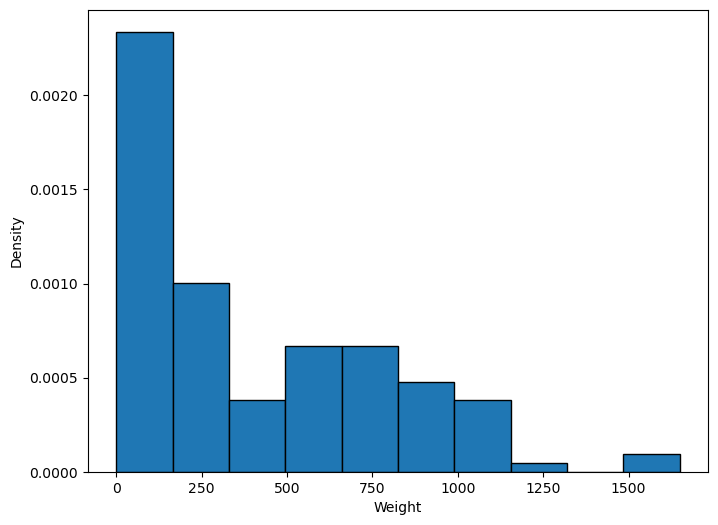

2026-01-21 09:54:09,004 | INFO     | Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                             
  ColumnName  OutlierPercentage
0    Length1           1.574803
1    Length3           0.787402
2    Length2           1.574803


2026-01-21 09:54:09,511 | INFO     | Feature Engineering started ...                    
2026-01-21 09:54:09,516 | INFO     | Handling duplicate records present in dataset ...  
2026-01-21 09:54:10,524 | INFO     | Analysis completed. No action taken.               
2026-01-21 09:54:10,527 | INFO     | Total time to handle duplicate records: 1.01 sec   
2026-01-21 09:54:10,535 | INFO     | Handling less significant features from data ...   
2026-01-21 09:54:14,063 | INFO     | Analysis indicates all categorical columns are significant. No action Needed.
2026-01-21 09:54:14,067 | INFO     | Total time to handle less significant features: 3.52 sec  
2026-01-21 09:54:14,074 | INFO     | Handling Date Features ...                          
2026-01-21 09:54:14,078 | INFO     | Analysis Completed. Dataset does not contain any feature related to dates. No action needed.
2026-01-21 09:54:14,082 | INFO     | Total time to handle date features: 0.00 sec        
2026-01-21 09:54:14,089 | INFO    

Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,automl_id
1,0,0,0,0,0,0,500,29.1,31.5,36.4,13.7592,4.368,26
1,0,0,0,0,0,0,700,30.4,33.0,38.5,14.938,5.1975,38
1,0,0,0,0,0,0,242,23.2,25.4,30.0,11.52,4.02,42
1,0,0,0,0,0,0,610,30.9,33.5,38.6,15.633,5.1338,46
1,0,0,0,0,0,0,685,31.4,34.0,39.2,15.9936,5.3704,54
1,0,0,0,0,0,0,680,31.8,35.0,40.6,15.4686,6.1306,58
0,0,0,1,0,0,0,1550,56.0,60.0,64.0,9.6,6.144,12
0,0,0,1,0,0,0,345,36.0,38.5,41.0,6.396,3.977,20
0,0,0,1,0,0,0,500,42.0,45.0,48.0,6.96,4.896,24
0,0,0,1,0,0,0,300,34.8,37.3,39.8,6.2884,4.0198,28


2026-01-21 09:54:26,199 | INFO     | Time taken to encode the columns: 10.07 sec         


2026-01-21 09:54:26,217 | INFO     | Data preparation started ...                        
2026-01-21 09:54:26,217 | INFO     | Outlier preprocessing ...                           
2026-01-21 09:54:39,774 | INFO     | Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                             
  ColumnName  OutlierPercentage
0    Length3           0.787402
1    Length2           1.574803
2    Length1           1.574803
2026-01-21 09:54:40,747 | INFO     | Deleting rows of these columns:                     
['Length2', 'Length1', 'Length3']                                                        
2026-01-21 

Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,automl_id
0,0,0,1,0,0,0,456,40.0,42.5,45.5,7.28,4.3225,44
0,1,0,0,0,0,0,150,18.4,20.0,22.4,8.8928,3.2928,56
0,1,0,0,0,0,0,55,13.5,14.7,16.5,6.8475,2.3265,60
0,1,0,0,0,0,0,120,17.5,19.0,21.3,8.3922,2.9181,68
0,0,0,0,1,0,0,40,12.9,14.1,16.2,4.1472,2.268,76
0,0,0,0,1,0,0,78,17.5,18.8,21.2,5.5756,2.9044,80
0,1,0,0,0,0,0,170,19.0,20.7,23.2,9.396,3.4104,72
0,1,0,0,0,0,0,60,14.3,15.5,17.4,6.5772,2.3142,48
0,0,0,1,0,0,0,1250,52.0,56.0,59.7,10.6863,6.9849,40
0,0,0,1,0,0,0,300,34.8,37.3,39.8,6.2884,4.0198,28


2026-01-21 09:54:51,213 | INFO     | Time Taken by Outlier processing: 24.98 sec         
2026-01-21 09:54:54,887 | INFO     | Feature selection using rfe ...                     
2026-01-21 09:55:25,294 | INFO     | feature selected by RFE:                            
['Species_2', 'Length1', 'Length2', 'Length3', 'Height', 'Width']                        
2026-01-21 09:55:25,294 | INFO     | Total time taken by feature selection: 30.40 sec    
2026-01-21 09:55:27,204 | INFO     | Scaling Features of rfe data ...                    
2026-01-21 09:55:34,373 | INFO     | columns that will be scaled:                        
['r_Length1', 'r_Length2', 'r_Length3', 'r_Height', 'r_Width']                           
2026-01-21 09:55:43,337 | INFO     | Dataset sample after scaling:                       


Weight,automl_id,r_Species_2,r_Length1,r_Length2,r_Length3,r_Height,r_Width
430,8,0,1.0379366915373667,1.0022610237820175,0.8982963381267267,-0.39456554745149713,0.07825924382355093
9,11,0,-1.5479293040980553,-1.6038563663617744,-1.6016345614296537,-1.5538468723319068,-1.8884631552919493
363,14,0,0.0548801973288591,0.10702985922880652,0.25962786013787037,0.8478233746243937,0.008484597047917217
7,15,0,-1.6761540642122086,-1.7232205216355363,-1.7384920924272658,-1.664725516020849,-1.898554529825615
290,18,0,-0.19088392622326786,-0.1615394901371567,0.04977964594153178,0.7907282954848767,-0.07795523395759878
12,19,0,-1.5265585107456967,-1.564068314603854,-1.5742630552301315,-1.5820518414268283,-1.7571599563596205
567,16,0,1.860712235603183,1.7980220589404272,1.6464508409136729,-0.27991862853934696,0.24750601100246344
500,10,0,0.10830718070975626,0.1766589498051673,0.3508662141362784,1.1788606434753137,0.48306752511689544
12,7,0,-1.46244613068862,-1.484492211088013,-1.5377677136307681,-1.5394360743570927,-1.8366223226875735
450,6,0,0.10830718070975626,0.1766589498051673,0.36911388493596026,1.047062362789652,0.2806057194728876


2026-01-21 09:55:46,425 | INFO     | Total time taken by feature scaling: 19.21 sec      
2026-01-21 09:55:46,429 | INFO     | Scaling Features of pca data ...                     
2026-01-21 09:55:55,294 | INFO     | columns that will be scaled:                         
['Length1', 'Length2', 'Length3', 'Height', 'Width']                                      
2026-01-21 09:56:04,327 | INFO     | Dataset sample after scaling:                        


Species_2,Species_1,Species_4,automl_id,Species_5,Species_6,Species_3,Weight,Species_0,Length1,Length2,Length3,Height,Width
0,0,0,42,0,0,0,242,1,-0.27636709963270445,-0.2510626065924784,-0.059706378856557815,0.5714831915891302,-0.24264646634702866
0,0,0,54,0,0,0,685,1,0.5998354278140086,0.6043805062028124,0.7796864779287966,1.5931653757433042,0.5360616576679752
0,0,0,58,0,0,0,680,1,0.6425770145187265,0.7038506355976136,0.9074201735265678,1.4732657095503183,0.9744309674104262
0,0,0,62,0,0,0,700,1,0.6532624111949057,0.7038506355976136,0.8982963381267268,1.6495524759014912,0.6621173418427975
0,0,0,74,0,0,0,1000,1,0.8242287580137767,0.9027908943872162,1.0898968815233838,2.2699476058314834,1.2468404148220726
0,0,0,78,0,0,0,920,1,0.9845097081564681,1.051996088479418,1.226754412520996,2.0598148765664046,1.0757483677284327
0,0,0,28,0,0,1,300,0,0.963138914804109,0.9326319332056562,0.834429490327841,-0.623311272516059,-0.24276179634169887
0,0,0,40,0,0,1,1250,0,2.8010271431069707,2.79272335288844,2.650072734896162,0.3810825216746688,1.4670630396453321
0,0,0,44,0,0,1,456,0,1.5187795419654395,1.449876606058623,1.3544881081187672,-0.3968493506170786,-0.06820984940794488
0,1,0,48,0,0,0,60,0,-1.2273674038126734,-1.2358168876010105,-1.2093096392364995,-0.5573550370940888,-1.2262959908914546


2026-01-21 09:56:07,506 | INFO     | Total time taken by feature scaling: 21.07 sec       
2026-01-21 09:56:07,511 | INFO     | Dimension Reduction using pca ...                    
2026-01-21 09:56:10,742 | INFO     | PCA columns:                                         
['col_0', 'col_1', 'col_2', 'col_3']                                                      
2026-01-21 09:56:10,742 | INFO     | Total time taken by PCA: 3.23 sec                    


2026-01-21 09:56:13,430 | INFO     | Model Training started ...                           
2026-01-21 09:56:14,016 | INFO     | Hyperparameters used for model training:             
2026-01-21 09:56:14,019 | INFO     | Model: xgboost                                                                                                   
2026-01-21 09:56:14,020 | INFO     | Hyperparameters: {'response_column': 'Weight', 'name': 'xgboost', 'model_type': 'Regression', 'column_sampling': (1, 0.6), 'min_impurity': (0.0, 0.1, 0.2), 'lambda1': (1.0, 0.01, 0.1), 'shrinkage_factor': (0.5, 0.1, 0.3), 'max_depth': (5, 6, 8, 10), 'min_node_size': (1, 2, 3), 'iter_num': (10, 20, 30), 'num_boosted_trees': (-1, 5, 10), 'seed': 42}
2026-01-21 09:56:14,022 | INFO     | Total number of models for xgboost: 5832
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,XGBOOST_5,pca,65.139071,9308.005092,0.050736,16.769930,-0.329417,96.478003,0.225247,282.044267,0.936229,0.952229,12.432164,0.046655,0.934103
1,2,XGBOOST_3,pca,86.111588,19359.397291,0.038214,13.902401,12.590693,139.138051,0.195483,481.691265,0.867365,0.914680,24.464918,0.043203,0.862944
2,3,XGBOOST_4,pca,97.400419,20220.082367,0.089251,24.918444,-5.127184,142.197336,0.298750,428.663688,0.861468,0.899440,26.383080,0.077946,0.856851
3,4,XGBOOST_0,rfe,102.857986,26940.013935,0.122913,27.897502,-9.752612,164.134134,0.350590,537.674231,0.815429,0.841840,35.953358,0.104604,0.806044
4,5,XGBOOST_2,rfe,168.997647,50368.334722,0.303665,60.241476,-33.259595,224.428908,0.551058,602.872469,0.654917,0.715779,79.088501,0.242467,0.637370
5,6,XGBOOST_1,rfe,220.175804,91114.577127,0.227634,35.989047,25.069990,301.851913,0.477111,738.383241,0.375756,0.697819,143.532102,0.272039,0.344015


In [23]:
aml.fit(data=fish_df_train, 
        target_column="Weight")

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [25]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,XGBOOST_5,pca,65.139071,9308.005092,0.050736,16.769930,-0.329417,96.478003,0.225247,282.044267,0.936229,0.952229,12.432164,0.046655,0.934103
1,2,XGBOOST_3,pca,86.111588,19359.397291,0.038214,13.902401,12.590693,139.138051,0.195483,481.691265,0.867365,0.914680,24.464918,0.043203,0.862944
2,3,XGBOOST_4,pca,97.400419,20220.082367,0.089251,24.918444,-5.127184,142.197336,0.298750,428.663688,0.861468,0.899440,26.383080,0.077946,0.856851
3,4,XGBOOST_0,rfe,102.857986,26940.013935,0.122913,27.897502,-9.752612,164.134134,0.350590,537.674231,0.815429,0.841840,35.953358,0.104604,0.806044
4,5,XGBOOST_2,rfe,168.997647,50368.334722,0.303665,60.241476,-33.259595,224.428908,0.551058,602.872469,0.654917,0.715779,79.088501,0.242467,0.637370
5,6,XGBOOST_1,rfe,220.175804,91114.577127,0.227634,35.989047,25.069990,301.851913,0.477111,738.383241,0.375756,0.697819,143.532102,0.272039,0.344015


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [26]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,XGBOOST_5,pca,65.139071,9308.005092,0.050736,16.76993,-0.329417,96.478003,0.225247,282.044267,0.936229,0.952229,12.432164,0.046655,0.934103


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [28]:
aml.model_hyperparameters(rank=1)

{'response_column': 'Weight',
 'model_type': 'Regression',
 'column_sampling': 0.6,
 'min_impurity': 0.2,
 'lambda1': 0.01,
 'shrinkage_factor': 0.5,
 'max_depth': 6,
 'min_node_size': 1,
 'iter_num': 30,
 'num_boosted_trees': 5,
 'seed': 42}

In [29]:
aml.model_hyperparameters(rank=4)

{'response_column': 'Weight',
 'model_type': 'Regression',
 'column_sampling': 1,
 'min_impurity': 0.1,
 'lambda1': 0.1,
 'shrinkage_factor': 0.5,
 'max_depth': 8,
 'min_node_size': 3,
 'iter_num': 30,
 'num_boosted_trees': 5,
 'seed': 42}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction : </b>

2026-01-21 09:57:33,291 | INFO     | Data Transformation started ...
2026-01-21 09:57:33,294 | INFO     | Performing transformation carried out in feature engineering phase ...
2026-01-21 09:57:42,329 | INFO     | Updated dataset after performing categorical encoding :    


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,automl_id
0,0,0,1,0,0,0,200,30.0,32.3,34.8,5.568,3.3756,24
0,1,0,0,0,0,0,300,24.0,26.0,29.0,11.368,4.234,36
0,1,0,0,0,0,0,90,16.3,17.7,19.8,7.4052,2.673,40
0,0,0,0,1,0,0,69,16.5,18.2,20.3,5.2983,2.8217,44
0,0,0,0,1,0,0,290,24.0,26.0,29.2,8.8768,4.4968,52
0,0,0,0,1,0,0,150,20.4,22.0,24.7,5.8045,3.7544,56
1,0,0,0,0,0,0,475,28.4,31.0,36.2,14.2628,5.1042,14
1,0,0,0,0,0,0,620,31.5,34.5,39.7,15.5227,5.2801,22
1,0,0,0,0,0,0,725,31.8,35.0,40.9,16.36,6.0532,26
1,0,0,0,0,0,0,850,32.8,36.0,41.6,16.8896,6.1984,30


2026-01-21 09:57:43,787 | INFO     | Performing transformation carried out in data preparation phase ...
2026-01-21 09:57:47,221 | INFO     | Updated dataset after performing RFE feature selection:    


automl_id,Species_2,Length1,Length2,Length3,Height,Width,Weight
84,1,20.0,22.0,23.5,6.11,3.525,130
76,1,26.9,28.7,30.1,7.5852,4.6354,300
68,1,36.5,39.0,41.4,11.1366,6.003,650
60,1,19.3,21.3,22.8,6.384,3.534,130
36,0,24.0,26.0,29.0,11.368,4.234,300
40,0,16.3,17.7,19.8,7.4052,2.673,90
44,0,16.5,18.2,20.3,5.2983,2.8217,69
52,0,24.0,26.0,29.2,8.8768,4.4968,290
56,0,20.4,22.0,24.7,5.8045,3.7544,150
7,0,10.8,11.3,12.6,1.9782,1.2852,8


2026-01-21 09:57:52,263 | INFO     | Updated dataset after performing scaling on RFE selected features :


automl_id,Weight,r_Species_2,r_Length1,r_Length2,r_Length3,r_Height,r_Width
40,90,0,-1.013659470289084,-1.0169826029324474,-0.9903375896403198,-0.3682561349840077,-1.0193939804526335
52,290,0,-0.19088392622326786,-0.19138052895559715,-0.1326970620552843,-0.032171661137154736,0.03230024094736929
56,150,0,-0.5755582065657275,-0.589261046534802,-0.5432696550481205,-0.7338245076985074,-0.39580469926941014
7,8,0,-1.6013562874789526,-1.653591431059175,-1.6472537384288577,-1.6076761129446435,-1.8196688134710148
15,6,0,-1.761637237621644,-1.802796625151377,-1.8114827756259921,-1.6623503607286452,-1.9566808471395312
34,270,0,-0.1801985295470883,-0.14164546425819655,-0.12357322665544337,-0.19920902466772555,-0.11088194743601763
72,690,1,0.9417681214517518,0.9027908943872163,0.7888103133286367,0.3549101373971151,1.1105203611215795
80,130,1,-0.5648728098895479,-0.5395259818374014,-0.607136502847006,-0.7220629213957669,-0.4709998557945555
84,130,1,-0.618299793270445,-0.589261046534802,-0.6527556798462101,-0.6640543209900175,-0.5280882031564376
64,115,1,-0.7251537600322394,-0.6887311759296033,-0.7439940338446182,-0.7080175319274455,-0.6535095723605719


2026-01-21 09:57:58,565 | INFO     | Updated dataset after performing scaling for PCA feature selection :


Species_1,Species_4,Species_2,automl_id,Species_5,Species_6,Species_3,Weight,Species_0,Length1,Length2,Length3,Height,Width
0,0,1,84,0,0,0,130,0,-0.618299793270446,-0.5892610465348025,-0.6527556798462102,-0.6640543209900183,-0.5280882031564381
0,0,1,76,0,0,0,300,0,0.11899257738593429,0.07718882041036575,-0.05058254345671688,-0.32714767800355615,0.11222392725400313
0,0,1,68,0,0,0,650,0,1.1447906582991596,1.1017311531768186,0.9804108567252939,0.48392217822076694,0.9008504308106672
0,0,1,60,0,0,0,130,0,-0.693097570003702,-0.6588901371111633,-0.7166225276450958,-0.6014781142531076,-0.522898353396267
1,0,0,36,0,0,0,300,0,-0.19088392622326897,-0.19138052895559754,-0.15094473285496587,0.5367693834723041,-0.11924337204962708
1,0,0,40,0,0,0,90,0,-1.0136594702890849,-1.0169826029324478,-0.9903375896403199,-0.36825613498400855,-1.019393980452634
0,1,0,44,0,0,0,69,0,-0.9922886769367261,-0.9672475382350473,-0.9447184126411159,-0.8494306239402022,-0.9336461294151407
0,1,0,52,0,0,0,290,0,-0.19088392622326897,-0.19138052895559754,-0.13269706205528434,-0.03217166113715555,0.03230024094736878
0,1,0,56,0,0,0,150,0,-0.5755582065657285,-0.5892610465348025,-0.5432696550481206,-0.7338245076985082,-0.39580469926941064
0,0,0,7,1,0,0,8,0,-1.6013562874789533,-1.6535914310591757,-1.647253738428858,-1.6076761129446444,-1.8196688134710153


2026-01-21 09:58:00,799 | INFO     | Updated dataset after performing PCA feature selection :   


,automl_id,col_0,col_1,col_2,col_3,Weight
0,72,1.827734,-0.667408,0.567335,-0.000055,690
1,24,0.024469,-0.938509,-1.185072,-0.330194,200
2,80,-1.293382,-0.429338,0.489462,-0.188158,130
3,36,-0.114747,0.598847,-0.084850,0.057381,300
4,84,-1.364127,-0.353753,0.502067,-0.199169,130
5,40,-2.013433,0.524827,-0.176454,-0.037859,90
6,64,-1.573706,-0.314849,0.493892,-0.218927,115
7,44,-2.124797,0.107155,-0.351936,0.813717,69
8,76,-0.026667,-0.579131,0.469461,-0.136936,300
9,52,-0.276643,0.137003,-0.226570,0.941699,290


2026-01-21 09:58:02,694 | INFO     | Data Transformation completed.⫿⫿⫿⫿⫿｜ 100% - 9/9            
2026-01-21 09:58:05,024 | INFO     | Following model is being picked for evaluation:
2026-01-21 09:58:05,026 | INFO     | Model ID : XGBOOST_5
2026-01-21 09:58:05,028 | INFO     | Feature Selection Method : pca
2026-01-21 09:58:08,055 | INFO     | Applying SHAP for Model Interpretation...
2026-01-21 09:58:16,261 | INFO     | SHAP Analysis Completed. Feature Importance Available.


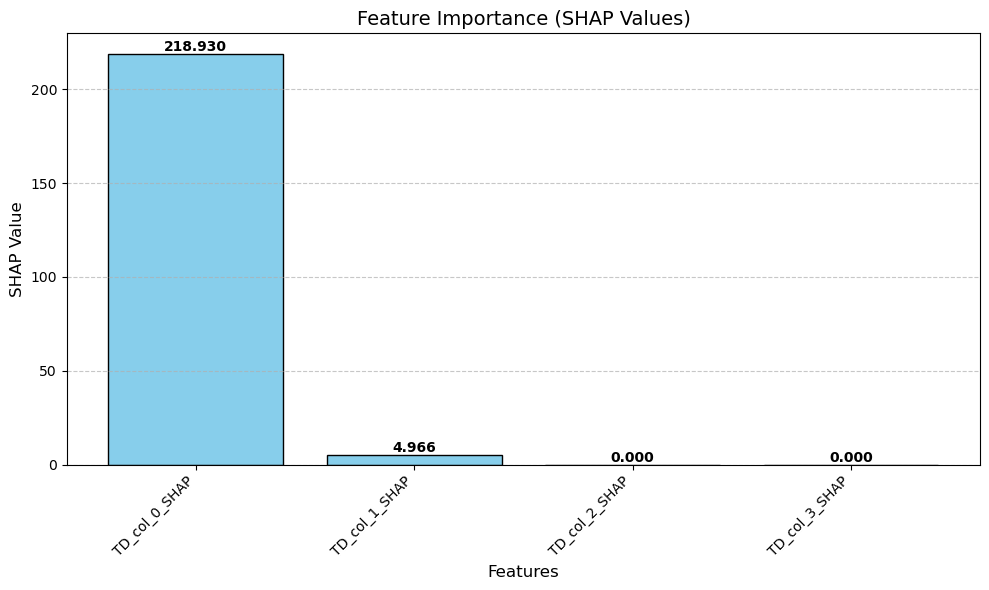

2026-01-21 09:58:16,842 | INFO     | Prediction : 
   automl_id  Prediction  Confidence_Lower  Confidence_upper  Weight
0         80  150.277495         50.392319        250.162671     130
1         84  147.057321         48.358847        245.755796     130
2         40   50.117419          1.277276         98.957562      90
3         64  108.192801         20.033582        196.352020     115
4         76  266.288384         87.604742        444.972026     300
5         52  216.977631         74.250339        359.704923     290
6         44   68.547797         18.487676        118.607919      69
7         36  237.345017         95.848021        378.842013     300
8         24  266.288384         87.604742        444.972026     200
9         72  586.774949        243.075762        930.474136     690


In [30]:
prediction = aml.predict(fish_df_test)

In [31]:
prediction

automl_id,Prediction,Confidence_Lower,Confidence_upper,Weight
80,150.2774946,50.39231863202012,250.1626705679799,130
84,147.0573214,48.35884712133003,245.75579567866998,130
40,50.117419,1.2772756833538352,98.95756231664616,90
64,108.19280099999999,20.033582226843365,196.3520197731566,115
76,266.2883842,87.60474201645656,444.97202638354344,300
52,216.9776308,74.25033873085192,359.70492286914805,290
44,68.54779740000001,18.487675982928657,118.60791881707135,69
36,237.3450168,95.84802058125086,378.8420130187491,300
24,266.2883842,87.60474201645656,444.97202638354344,200
72,586.774949,243.07576153629617,930.4741364637039,690


In [32]:
prediction.shape

(32, 5)

### Prediction with `preserve_columns`

2026-01-21 09:58:27,153 | INFO     | Skipping data transformation as data is already transformed.
2026-01-21 09:58:29,501 | INFO     | Following model is being picked for evaluation:
2026-01-21 09:58:29,503 | INFO     | Model ID : XGBOOST_3
2026-01-21 09:58:29,504 | INFO     | Feature Selection Method : pca
2026-01-21 09:58:32,602 | INFO     | Applying SHAP for Model Interpretation...
2026-01-21 09:58:40,819 | INFO     | SHAP Analysis Completed. Feature Importance Available.


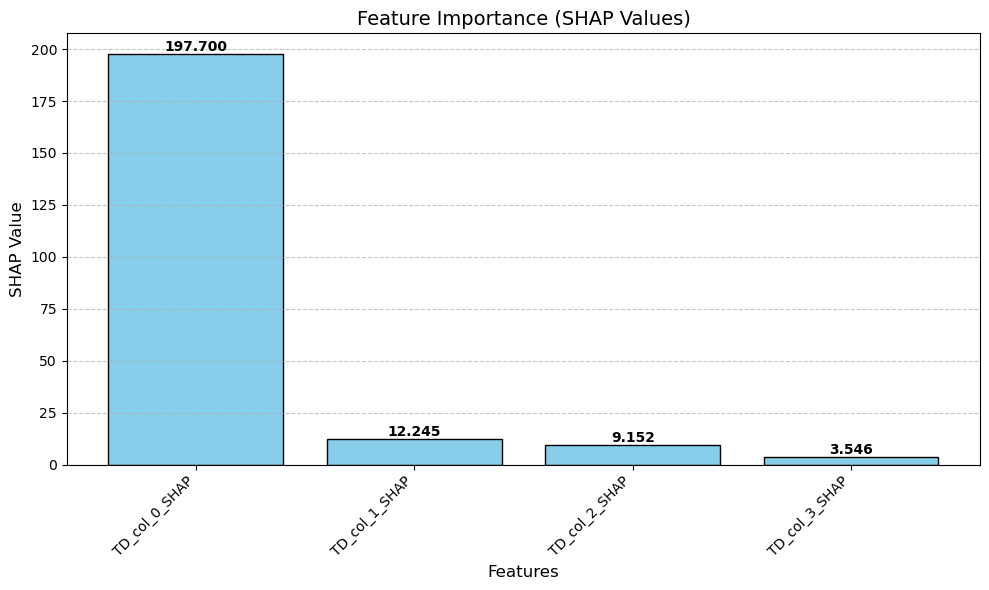

2026-01-21 09:58:41,383 | INFO     | Prediction : 
   automl_id  Prediction  Confidence_Lower  Confidence_upper     col_0     col_1     col_2     col_3  Weight
0         80  117.968778        117.968778        117.968778 -1.293382 -0.429338  0.489462 -0.188158     130
1         84  122.651837        122.651837        122.651837 -1.364127 -0.353753  0.502067 -0.199169     130
2         40   77.655500         77.655500         77.655500 -2.013433  0.524827 -0.176454 -0.037859      90
3         64   81.410131         81.410131         81.410131 -1.573706 -0.314849  0.493892 -0.218927     115
4         76  236.660128        236.660128        236.660128 -0.026667 -0.579131  0.469461 -0.136936     300
5         52  243.222295        243.222295        243.222295 -0.276643  0.137003 -0.226570  0.941699     290
6         44   62.056718         62.056718         62.056718 -2.124797  0.107155 -0.351936  0.813717      69
7         36  253.268449        253.268449        253.268449 -0.114747  0.598

In [33]:
prediction = aml.predict(fish_df_test, rank=2, preserve_columns=True)

In [34]:
prediction

automl_id,Prediction,Confidence_Lower,Confidence_upper,col_0,col_1,col_2,col_3,Weight
80,117.96877799999999,117.96877799999999,117.96877799999999,-1.2933815275055387,-0.4293381190881461,0.4894623765880096,-0.18815819889407392,130
84,122.651837,122.651837,122.651837,-1.3641268128293103,-0.3537531994667826,0.5020668122668098,-0.19916882842962952,130
40,77.65549999999999,77.65549999999999,77.65549999999999,-2.0134333275536664,0.5248269271796553,-0.17645368783847684,-0.037859350688234136,90
64,81.41013099999999,81.41013099999999,81.41013099999999,-1.573706447342469,-0.31484906441789356,0.4938918801822646,-0.21892654773227188,115
76,236.660128,236.660128,236.660128,-0.026667278818878933,-0.5791307074921803,0.4694610488448746,-0.13693633449696507,300
52,243.22229499999997,243.22229499999997,243.22229499999997,-0.2766434203352653,0.1370028151465248,-0.22657010631733054,0.9416994749957858,290
44,62.056718,62.056718,62.056718,-2.1247973835792457,0.10715542834836114,-0.35193569196373997,0.8137169421445722,69
36,253.26844899999998,253.26844899999998,253.26844899999998,-0.11474711776534006,0.5988472397104011,-0.08485046919067293,0.05738104877490545,300
24,245.17752,245.17752,245.17752,0.024469378230081947,-0.9385088704410877,-1.185071709025013,-0.3301939695230176,200
72,632.435588,632.435588,632.435588,1.8277339739536187,-0.6674083811404148,0.5673348349236805,-5.5469643343422637e-05,690


## <b><span style='color:#F1A424'>| 7.</span> Get original data with id column added using 'get_raw_data_with_id' </b> 

### training data

In [35]:
input_data=aml.get_raw_data_with_id(fish_df_train)

2026-01-21 09:59:46,013 | INFO     | Data Transformation started ...
2026-01-21 09:59:46,017 | INFO     | Performing transformation carried out in feature engineering phase ...
2026-01-21 09:59:55,081 | INFO     | Updated dataset after performing categorical encoding :    


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,automl_id
1,0,0,0,0,0,0,500,29.1,31.5,36.4,13.7592,4.368,26
1,0,0,0,0,0,0,700,30.4,33.0,38.5,14.938,5.1975,38
1,0,0,0,0,0,0,242,23.2,25.4,30.0,11.52,4.02,42
1,0,0,0,0,0,0,610,30.9,33.5,38.6,15.633,5.1338,46
1,0,0,0,0,0,0,685,31.4,34.0,39.2,15.9936,5.3704,54
1,0,0,0,0,0,0,680,31.8,35.0,40.6,15.4686,6.1306,58
0,0,0,1,0,0,0,1550,56.0,60.0,64.0,9.6,6.144,12
0,0,0,1,0,0,0,345,36.0,38.5,41.0,6.396,3.977,20
0,0,0,1,0,0,0,500,42.0,45.0,48.0,6.96,4.896,24
0,0,0,1,0,0,0,300,34.8,37.3,39.8,6.2884,4.0198,28


2026-01-21 09:59:56,487 | INFO     | Performing transformation carried out in data preparation phase ...
2026-01-21 09:59:59,912 | INFO     | Updated dataset after performing RFE feature selection:    


automl_id,Species_2,Length1,Length2,Length3,Height,Width,Weight
40,0,52.0,56.0,59.7,10.6863,6.9849,1250
52,0,19.0,20.7,23.2,8.5376,3.2944,140
56,0,18.4,20.0,22.4,8.8928,3.2928,150
60,0,13.5,14.7,16.5,6.8475,2.3265,55
72,0,19.0,20.7,23.2,9.396,3.4104,170
76,0,12.9,14.1,16.2,4.1472,2.268,40
68,0,17.5,19.0,21.3,8.3922,2.9181,120
44,0,40.0,42.5,45.5,7.28,4.3225,456
36,0,48.3,51.7,55.1,8.9262,6.1712,950
24,0,42.0,45.0,48.0,6.96,4.896,500


2026-01-21 10:00:04,892 | INFO     | Updated dataset after performing scaling on RFE selected features :


automl_id,Weight,r_Species_2,r_Length1,r_Length2,r_Length3,r_Height,r_Width
160,78,1,-0.9602324869081867,-0.9175124735376462,-1.0268329312396833,-0.872063113311106,-0.7596708324547382
172,70,1,-1.0777718503461606,-1.0468236417508878,-1.1089474498382503,-1.0116491627913973,-0.8645634626075295
176,1000,1,1.6363189054034148,1.599081800150825,1.454850297517016,0.7927380422705874,1.8193385083662788
180,51,1,-1.1525696270794166,-1.1661877970246493,-1.227557310036181,-1.010644289398542,-1.0432672893494204
188,1100,1,1.4119255752036466,1.4001415413612224,1.2723735895201997,0.86385567284677,1.3998833177497851
192,32,1,-1.4197045439839022,-1.4148631205116522,-1.455653195032201,-1.2537322983429495,-1.407940732497442
24,500,0,1.7324874754890296,1.6985519295456262,1.582583993114787,-0.46993105191565965,0.26249891030962424
36,950,0,2.4056674660883335,2.3650017964907946,2.230376306503484,-0.020889673499186096,0.9978429563285315
40,1250,0,2.8010271431069724,2.7927233528884394,2.6500727348961615,0.38108252167466955,1.4670630396453326
44,456,0,1.5187795419654408,1.449876606058623,1.354488108118767,-0.39684935061707777,-0.06820984940794436


2026-01-21 10:00:11,440 | INFO     | Updated dataset after performing scaling for PCA feature selection :


Species_1,Species_4,Species_2,automl_id,Species_5,Species_6,Species_3,Weight,Species_0,Length1,Length2,Length3,Height,Width
0,0,0,40,0,0,1,1250,0,2.8010271431069707,2.79272335288844,2.650072734896162,0.3810825216746688,1.4670630396453321
1,0,0,52,0,0,0,140,0,-0.7251537600322404,-0.7185722147480442,-0.6801271860457327,-0.10963826451365226,-0.6610636870114882
1,0,0,56,0,0,0,150,0,-0.7892661400893171,-0.788201305324405,-0.7531178692444592,-0.028517576072226457,-0.6619863269688518
1,0,0,60,0,0,0,55,0,-1.3128505772221088,-1.3153929911168516,-1.2914241578350667,-0.4956238375284431,-1.219203196219221
1,0,0,72,0,0,0,170,0,-0.7251537600322404,-0.7185722147480442,-0.6801271860457327,0.08640339921979376,-0.5941722901026164
0,1,0,76,0,0,0,40,0,-1.3769629572791855,-1.3750750687537323,-1.318795664034589,-1.1123192063301945,-1.2529372196603328
0,0,1,148,0,0,0,85,0,-0.8533785201463934,-0.8279893570823254,-0.899099235641912,-0.8861313408110839,-0.8096087201470518
0,0,1,156,0,0,0,110,0,-0.7251537600322404,-0.6887311759296038,-0.7439940338446183,-0.7594031031530118,-0.5107887039558676
0,0,1,160,0,0,0,78,0,-0.9602324869081877,-0.9175124735376466,-1.0268329312396833,-0.8720631133111068,-0.7596708324547388
0,0,1,164,0,0,0,100,0,-1.0243448669652644,-0.9871415641140074,-1.045080602039365,-0.8667646899669595,-0.6453788077363045


2026-01-21 10:00:13,642 | INFO     | Updated dataset after performing PCA feature selection :   


,automl_id,col_0,col_1,col_2,col_3,Weight
0,148,-1.907353,-0.346510,0.472969,-0.235363,85
1,24,2.259916,-1.549994,-1.451632,-0.309962,500
2,156,-1.530506,-0.358406,0.551050,-0.168719,110
3,36,3.675762,-1.688556,-1.418309,-0.218247,950
4,160,-2.028414,-0.274276,0.562767,-0.196583,78
...,...,...,...,...,...,...
122,84,0.770563,-0.147418,-0.299649,0.985064,390
123,48,-2.478955,0.537845,-0.178709,-0.054830,60
124,28,0.927153,-1.153126,-1.268433,-0.314277,300
125,20,1.089634,-1.210714,-1.344851,-0.348736,345


2026-01-21 10:00:15,614 | INFO     | Data Transformation completed.⫿⫿⫿⫿⫿｜ 100% - 9/9            


In [36]:
input_data

Species,Weight,Length1,Length2,Length3,Height,Width,automl_id
Bream,363,26.3,29.0,33.5,12.73,4.4555,14
Bream,500,28.7,31.0,36.2,14.3714,4.8146,22
Bream,500,29.1,31.5,36.4,13.7592,4.368,26
Bream,600,29.4,32.0,37.2,14.9544,5.1708,30
Bream,700,30.4,33.0,38.5,14.938,5.1975,38
Bream,242,23.2,25.4,30.0,11.52,4.02,42
Smelt,7,10.1,10.6,11.6,1.7284,1.1484,7
Smelt,9,10.7,11.2,12.4,2.0832,1.2772,11
Smelt,10,11.3,11.8,13.1,2.2139,1.2838,15
Smelt,9,11.4,12.0,13.2,2.2044,1.1484,19


In [37]:
input_data.shape

(127, 8)

### testing data

In [38]:
test_data_with_id=aml.get_raw_data_with_id(fish_df_test)

In [39]:
test_data_with_id

Species,Weight,Length1,Length2,Length3,Height,Width,automl_id
Bream,475,28.4,31.0,36.2,14.2628,5.1042,14
Bream,620,31.5,34.5,39.7,15.5227,5.2801,22
Bream,725,31.8,35.0,40.9,16.36,6.0532,26
Bream,850,32.8,36.0,41.6,16.8896,6.1984,30
Pike,1600,56.0,60.0,64.0,9.6,6.144,4
Pike,300,31.7,34.0,37.8,5.7078,4.158,8
Pike,300,32.7,35.0,38.8,5.9364,4.3844,12
Pike,510,40.0,42.5,45.5,6.825,4.459,16
Pike,540,40.1,43.0,45.8,7.786,5.1296,20
Pike,200,30.0,32.3,34.8,5.568,3.3756,24


### Get merged testing data with prediction

In [41]:
merge_df=test_data_with_id.merge(right = prediction, how = "inner", on = "automl_id=automl_id", lsuffix = "test_df", rsuffix = "prediction_df")

In [42]:
merge_df

Species,Weight_test_df,Weight_prediction_df,Length1,Length2,Length3,Height,Width,automl_id_test_df,automl_id_prediction_df,Prediction,Confidence_Lower,Confidence_upper,col_0,col_1,col_2,col_3
Perch,130,130,20.5,22.5,24.0,5.856,3.624,80,80,117.96877799999999,117.96877799999999,117.96877799999999,-1.2933815275055387,-0.4293381190881461,0.4894623765880096,-0.18815819889407392
Perch,130,130,20.0,22.0,23.5,6.11,3.525,84,84,122.651837,122.651837,122.651837,-1.3641268128293103,-0.3537531994667826,0.5020668122668098,-0.19916882842962952
Parkki,90,90,16.3,17.7,19.8,7.4052,2.673,40,40,77.65549999999999,77.65549999999999,77.65549999999999,-2.0134333275536664,0.5248269271796553,-0.17645368783847684,-0.037859350688234136
Perch,115,115,19.0,21.0,22.5,5.9175,3.3075,64,64,81.41013099999999,81.41013099999999,81.41013099999999,-1.573706447342469,-0.31484906441789356,0.4938918801822646,-0.21892654773227188
Perch,300,300,26.9,28.7,30.1,7.5852,4.6354,76,76,236.660128,236.660128,236.660128,-0.026667278818878933,-0.5791307074921803,0.4694610488448746,-0.13693633449696507
Roach,290,290,24.0,26.0,29.2,8.8768,4.4968,52,52,243.22229499999997,243.22229499999997,243.22229499999997,-0.2766434203352653,0.1370028151465248,-0.22657010631733054,0.9416994749957858
Roach,69,69,16.5,18.2,20.3,5.2983,2.8217,44,44,62.056718,62.056718,62.056718,-2.1247973835792457,0.10715542834836114,-0.35193569196373997,0.8137169421445722
Parkki,300,300,24.0,26.0,29.0,11.368,4.234,36,36,253.26844899999998,253.26844899999998,253.26844899999998,-0.11474711776534006,0.5988472397104011,-0.08485046919067293,0.05738104877490545
Pike,200,200,30.0,32.3,34.8,5.568,3.3756,24,24,245.17752,245.17752,245.17752,0.024469378230081947,-0.9385088704410877,-1.185071709025013,-0.3301939695230176
Perch,690,690,34.6,37.0,39.3,10.5717,6.3666,72,72,632.435588,632.435588,632.435588,1.8277339739536187,-0.6674083811404148,0.5673348349236805,-5.5469643343422637e-05


In [43]:
merge_df.shape

(32, 17)

## <b><span style='color:#F1A424'>| 8.</span> Generate Performance Metrics : </b>

In [44]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(fish_df_test)

2026-01-21 10:12:06,531 | INFO     | Skipping data transformation as data is already transformed.
2026-01-21 10:12:08,820 | INFO     | Following model is being picked for evaluation:
2026-01-21 10:12:08,822 | INFO     | Model ID : XGBOOST_5
2026-01-21 10:12:08,824 | INFO     | Feature Selection Method : pca
2026-01-21 10:12:15,177 | INFO     | Performance Metrics : 
         MAE           MSE      MSLE       MAPE        MPE        RMSE     RMSLE          ME        R2        EV       MPD       MGD
0  69.649752  17382.910094  0.250001  51.933773 -36.837035  131.844265  0.500001  632.044267  0.823697  0.824331  25.52484  0.193572


In [45]:
performance_metrics

MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD
69.64975224999996,17382.910093646744,0.25000104054352495,51.93377273511083,-36.83703518440965,131.84426454589044,0.5000010405424422,632.0442668,0.8236965751905543,0.8243314753275829,25.52483955343898,0.19357152141357398


## <b><span style='color:#F1A424'>| 9.</span> Get Failed Models with `get_error_logs` : </b>

In [46]:
errored_models = aml.get_error_logs("xgboost")
errored_models

MODEL_ID,ERROR_MSG


## <b><span style='color:#F1A424'>| 10.</span> Get transformed data with 'get_transformed_data'

In [47]:
trans_data=aml.get_transformed_data(fish_df_test)

In [48]:
trans_data

{'rfe_test':    automl_id  Weight  r_Species_2  r_Length1  r_Length2  r_Length3  r_Height   r_Width
 0         84     130            1  -0.618300  -0.589261  -0.652756 -0.664054 -0.528088
 1         76     300            1   0.118993   0.077189  -0.050583 -0.327148  0.112224
 2         68     650            1   1.144791   1.101731   0.980411  0.483922  0.900850
 3         60     130            1  -0.693098  -0.658890  -0.716623 -0.601478 -0.522898
 4         36     300            0  -0.190884  -0.191381  -0.150945  0.536769 -0.119243
 5         40      90            0  -1.013659  -1.016983  -0.990338 -0.368256 -1.019394
 6         44      69            0  -0.992289  -0.967248  -0.944718 -0.849431 -0.933646
 7         52     290            0  -0.190884  -0.191381  -0.132697 -0.032172  0.032300
 8         56     150            0  -0.575558  -0.589261  -0.543270 -0.733825 -0.395805
 9          7       8            0  -1.601356  -1.653591  -1.647254 -1.607676 -1.819669,
 'pca_test':    aut

In [49]:
trans_data['pca_test']

automl_id,col_0,col_1,col_2,col_3,Weight
80,-1.2933815275055387,-0.4293381190881461,0.4894623765880096,-0.18815819889407392,130
84,-1.3641268128293103,-0.3537531994667826,0.5020668122668098,-0.19916882842962952,130
40,-2.0134333275536664,0.5248269271796553,-0.17645368783847684,-0.037859350688234136,90
64,-1.573706447342469,-0.31484906441789356,0.4938918801822646,-0.21892654773227188,115
76,-0.026667278818878933,-0.5791307074921803,0.4694610488448746,-0.13693633449696507,300
52,-0.2766434203352653,0.1370028151465248,-0.22657010631733054,0.9416994749957858,290
44,-2.1247973835792457,0.10715542834836114,-0.35193569196373997,0.8137169421445722,69
36,-0.11474711776534006,0.5988472397104011,-0.08485046919067293,0.05738104877490545,300
24,0.024469378230081947,-0.9385088704410877,-1.185071709025013,-0.3301939695230176,200
72,1.8277339739536187,-0.6674083811404148,0.5673348349236805,-5.5469643343422637e-05,690


In [50]:
trans_data['rfe_test']

automl_id,Weight,r_Species_2,r_Length1,r_Length2,r_Length3,r_Height,r_Width
84,130,1,-0.618299793270445,-0.589261046534802,-0.6527556798462101,-0.6640543209900175,-0.5280882031564376
76,300,1,0.11899257738593545,0.07718882041036608,-0.05058254345671687,-0.3271476780035553,0.11222392725400364
68,650,1,1.144790658299161,1.1017311531768188,0.9804108567252938,0.4839221782207677,0.9008504308106676
60,130,1,-0.693097570003701,-0.6588901371111628,-0.7166225276450957,-0.6014781142531068,-0.5228983533962666
36,300,0,-0.19088392622326786,-0.19138052895559715,-0.15094473285496585,0.5367693834723049,-0.11924337204962657
40,90,0,-1.013659470289084,-1.0169826029324474,-0.9903375896403198,-0.3682561349840077,-1.0193939804526335
44,69,0,-0.9922886769367251,-0.9672475382350467,-0.9447184126411158,-0.8494306239402014,-0.9336461294151401
52,290,0,-0.19088392622326786,-0.19138052895559715,-0.1326970620552843,-0.032171661137154736,0.03230024094736929
56,150,0,-0.5755582065657275,-0.589261046534802,-0.5432696550481205,-0.7338245076985074,-0.39580469926941014
7,8,0,-1.6013562874789526,-1.653591431059175,-1.6472537384288577,-1.6076761129446435,-1.8196688134710148


## <b><span style='color:#F1A424'>| 11.</span> Deploy Trained Models

In [51]:
aml.deploy("fish_models_3_5", ranks=[3, 5])

2026-01-21 10:15:54,394 | INFO     | Model Deployment Completed Successfully.


In [52]:
remove_context()

True